# Energy Consumption of Appliances in Houses

Aim of this notebook is to explore predictors of appliances energy consumption in a house and find a best possible model that explains the most variation in the data.


In [1]:
# import all necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

## Exploration of Data

In [2]:
# read data
energy = pd.read_csv('data/energydata_complete.csv', index_col='date', parse_dates=True)
energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


C:\Users\renat\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2477: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


Text(0, 0.5, 'Frequency')

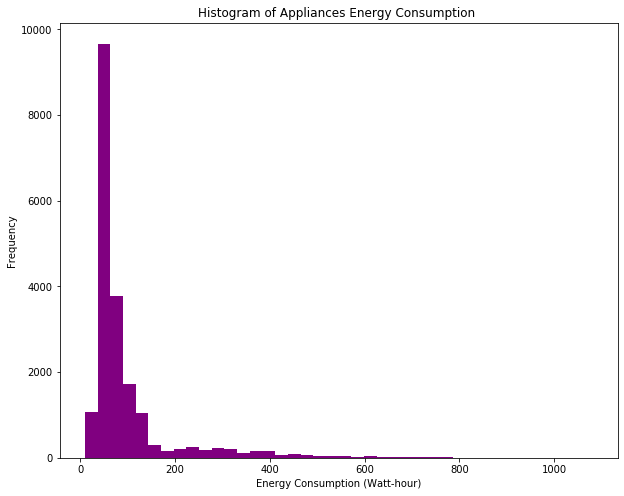

In [3]:
# histogram of appliances energy consumption
plt.figure(figsize=(10,8))
energy['Appliances'].hist(normed=0, histtype='stepfilled', bins=40, color='purple', grid=False)
plt.title('Histogram of Appliances Energy Consumption ')
plt.xlabel('Energy Consumption (Watt-hour)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

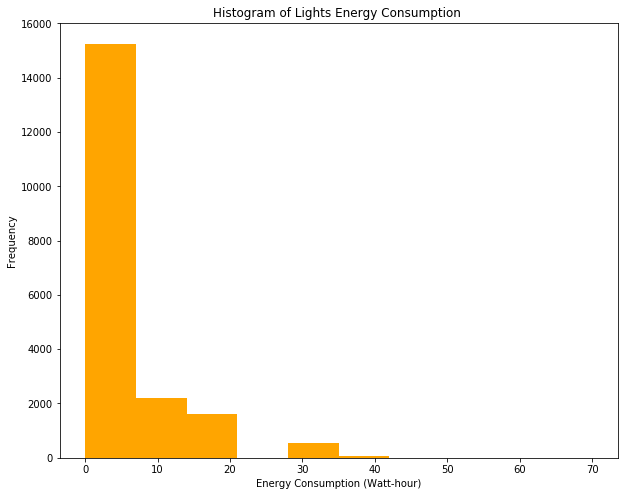

In [4]:
# histogram of lights energy consumption
plt.figure(figsize=(10,8))
energy['lights'].hist(normed=0, histtype='stepfilled', bins=10, color='orange', grid=False)
plt.title('Histogram of Lights Energy Consumption ')
plt.xlabel('Energy Consumption (Watt-hour)')
plt.ylabel('Frequency')

## Comments on Histograms

* The distribution of energy consumption for both appliances and lights are right skewed.
* The range of energy consumption (Wh) for appliances is far greater than for lights.

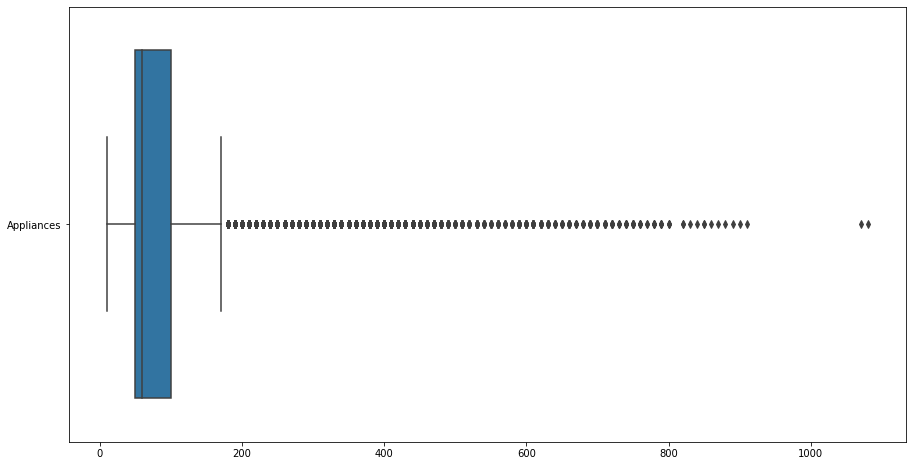

In [5]:
# boxplot of appliances
plt.figure(figsize=(15,8))
sns.boxplot(data=energy[['Appliances']], orient="h")

## Comments on the boxplot

* It has many outliers.
* The median energy consumption for appliances is about 90 Wh.
* Energy consumption of appliances is highly dispersed and skewed.

In [6]:
energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


# Comments on the means

* The mean energy consumtion (in Wh) for appliances is significantly greater (97.7) than for lights (3.8).
* The mean temperature (in Celcius) is very similar in all rooms, it ranges between 20 and 23.
* Similarly, the mean room humidity is approximately is the same across all rooms.
* The standard deviation for appliances is big, meaning the data vary a lot. 

In [7]:
energy.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

* There are no missing values.

C:\Users\renat\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


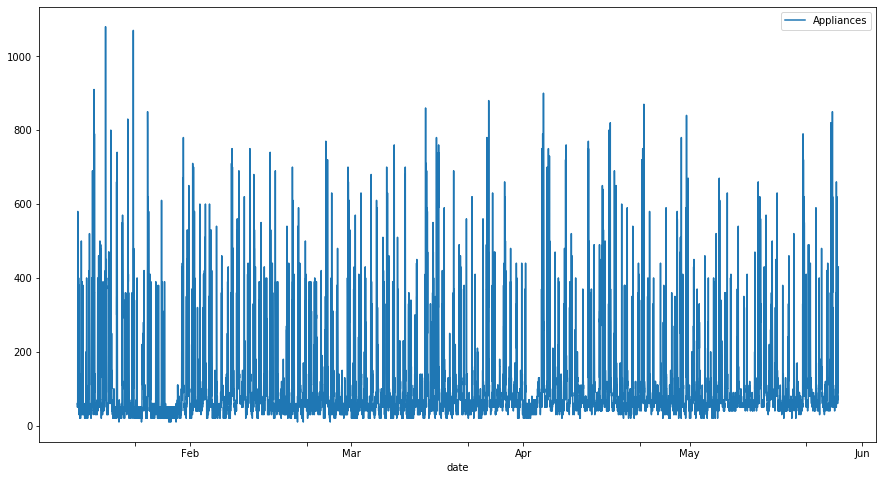

In [8]:
plt.figure(figsize=(15,8))
fig = sns.lineplot(data=energy[['Appliances']])
fig.set(xticklabels=['', 'Feb', '', 'Mar', '', 'Apr', '', 'May', '', 'Jun']);

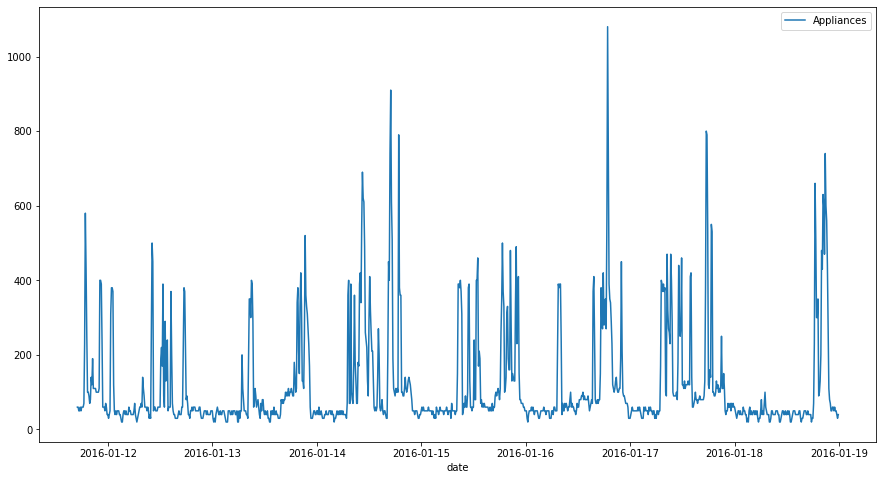

In [9]:
plt.figure(figsize=(15,8))
fig = sns.lineplot(data=energy[['Appliances']].query('index < "2016-01-19 00:00:00"'))

## Comments on line plots

* High spikes occur throughout the given time period.
* The energy consumption of appliances has high variance.

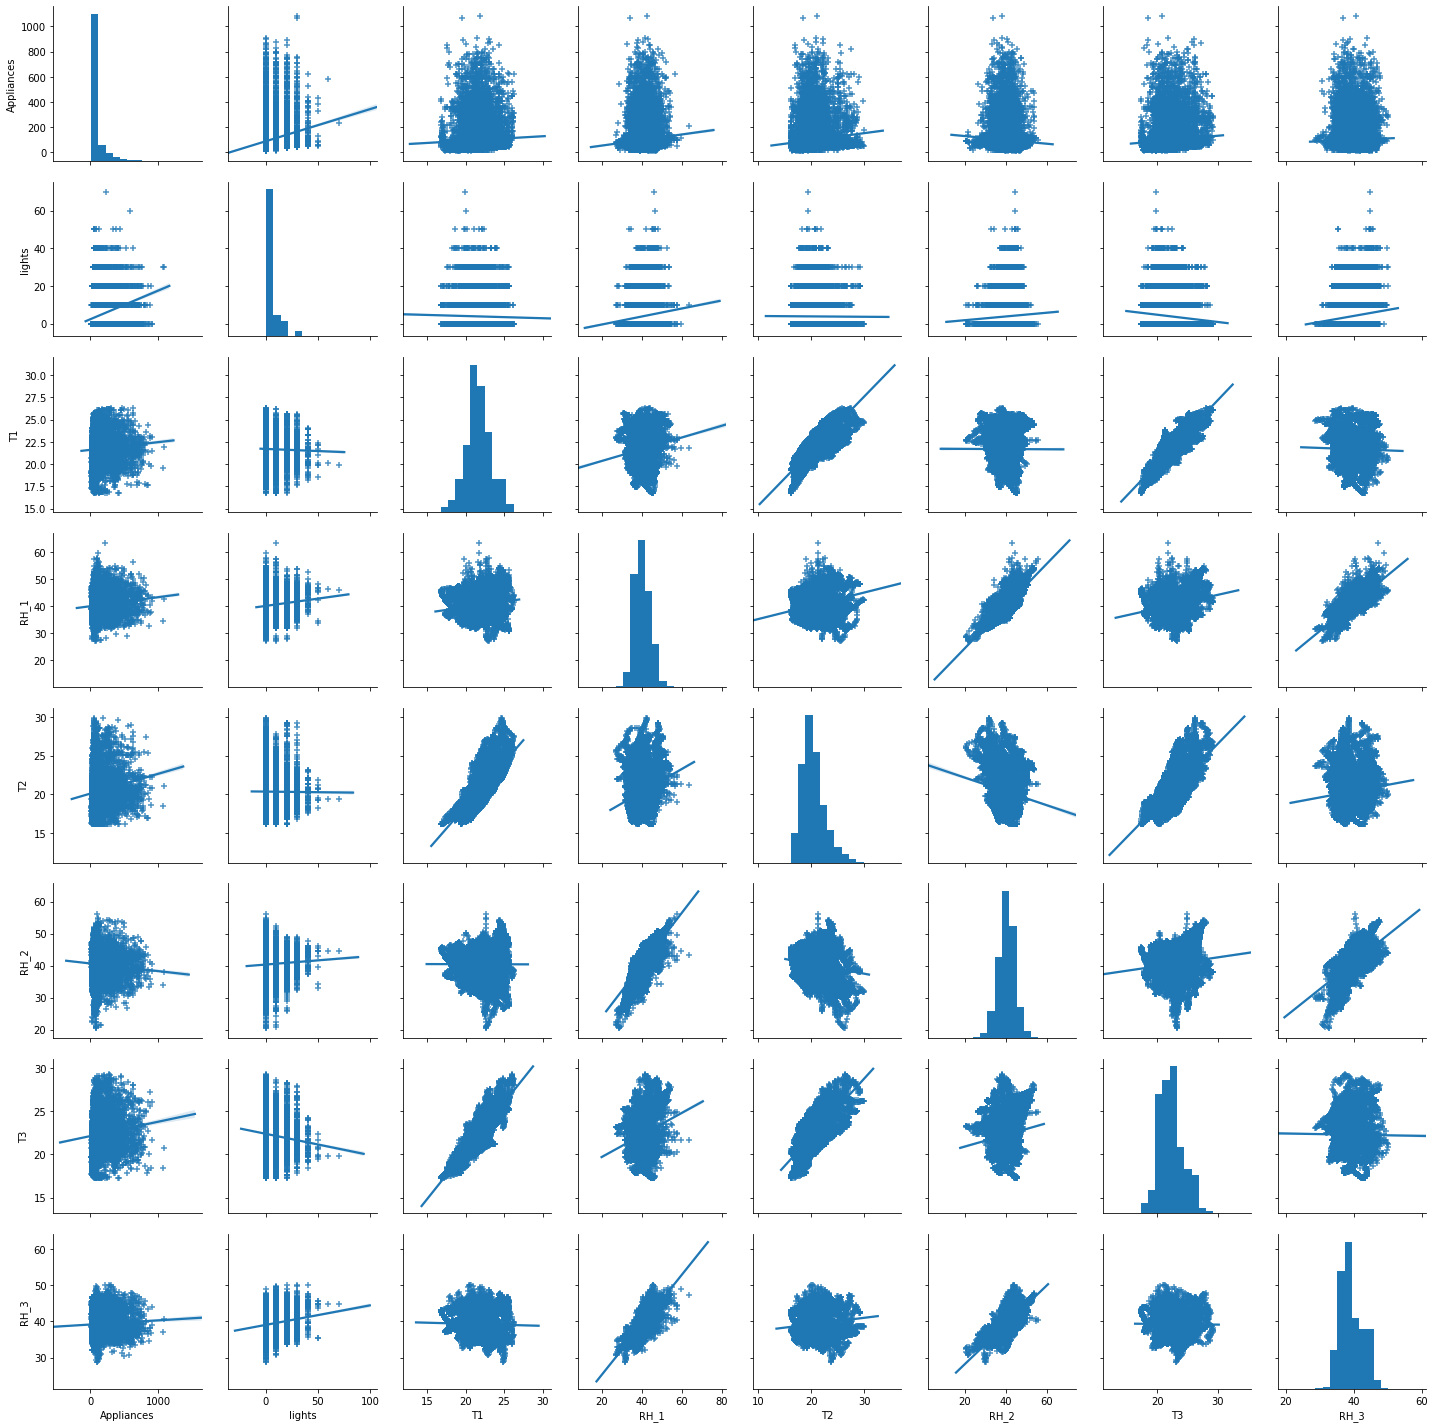

In [10]:
# scatterplot matrix for kitchen, living room, and laundry room
selected1 = energy[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']]
sns.pairplot(selected1, kind='reg', markers='+')

## Comments on the scatterplot matrix

There is a positive linear relationship between:

   * kitchen (T1) & living room (T2) temperature
   * kitchen (T1) & laundry room (T3) temperature
   * living room (T2) & laundry room (T3) temperature.
   
Similar trend can be obseved between room humidity in different rooms.


C:\Users\renat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\renat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


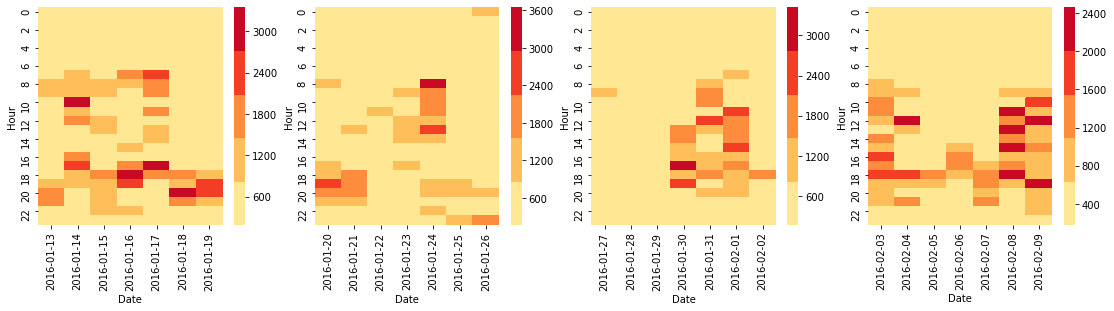

In [11]:
# creation of heatmaps
energy_heatmap = energy[['Appliances']] # take out Appliances and index column
energy_heatmap['Hour'] = energy_heatmap.apply(lambda x: x.name.hour, axis=1) # get hour from index
energy_heatmap['Date'] = energy_heatmap.apply(lambda x: x.name.strftime("%Y-%m-%d"), axis=1) # get date from index
energy_heatmap = energy_heatmap.reset_index(drop=True).groupby(['Date', 'Hour']).sum().reset_index() # drop index, groupby date & hour, then get sum of these values, then reset origianl index
                                                                                                    
fig, axs = plt.subplots(figsize=(19,4), nrows=1, ncols=4) # set multiple heatmaps next to each other

start_datetime = np.datetime64('2016-01-12 00:00:00')
end_datetime = start_datetime + np.timedelta64(7, 'D')

# iterate through 4 weeks worth of data
for i, (ax) in enumerate(axs.flatten()):
    sns.heatmap(data=energy_heatmap.query('Date > "' + str(start_datetime) + '" & Date <= "' + str(end_datetime) + '"').pivot('Hour','Date','Appliances'),
                cmap=sns.color_palette("YlOrRd", 5),
                ax=ax)

    start_datetime = end_datetime
    end_datetime = start_datetime + np.timedelta64(7, 'D')

plt.show()


## Comments on heatmaps

* Energy consumption increases in the afternoons and evenings.
* Energy consumption has a different pattern in the four consecutive weeks.
* Majority of the time, energy consumption is between 600 and 1200 Wh. (light yellow colours dominate heatmaps)

In [12]:
energy.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


## Comments on the correlation matrix

* Relatively strong correlation can only be observed between different room temperatures and humidity.
* However, appliances have no strong correlation with any of the variables.

In [13]:
# read train & test data
energy_train = pd.read_csv('data/energydata_training.csv', index_col='date', parse_dates=True)
energy_test = pd.read_csv('data/energydata_testing.csv', index_col='date', parse_dates=True)
energy_train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
count,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,...,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000
mean,98.011214,3.802608,21.684167,40.271439,20.342506,40.418056,22.262628,39.249149,20.855433,39.030359,...,41.542065,7.413018,755.502983,79.734122,4.034470,38.330141,3.756859,25.078087,25.078087,42985.989326
std,102.828019,7.940340,1.607780,3.981741,2.191842,4.066223,2.013785,3.252755,2.044786,4.339783,...,4.150839,5.323843,7.427684,14.955609,2.436870,11.812780,4.200297,14.481537,14.481537,24968.649028
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.893333,17.200000,28.766667,15.100000,27.660000,...,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000
25%,50.000000,0.000000,20.730000,37.361667,18.823333,37.900000,20.790000,36.900000,19.500000,35.530000,...,38.500000,3.666667,750.866667,70.000000,2.000000,29.000000,0.900000,12.580425,12.580425,21600.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,40.863333,6.900000,756.100000,83.666667,3.666667,40.000000,3.450000,25.043993,25.043993,43200.000000
75%,100.000000,0.000000,22.600000,43.090000,21.500000,43.290000,23.290000,41.761667,22.100000,42.130000,...,44.363333,10.400000,760.933333,91.666667,5.500000,40.000000,6.533333,37.665907,37.665907,64800.000000
max,1080.000000,50.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.063333,...,53.326667,25.966667,772.300000,100.000000,13.500000,66.000000,15.500000,49.996530,49.996530,85800.000000


## Recursive Feature Elimination

Aim is to find the best predictors of appliances energy consumption using RFE, then evaluate the model by looking at metrics like Mean Squared Error (MSE) and R-Squared.

In [27]:
# setting up the possible predictor features and the response variable
feature_cols = np.array(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Windspeed', 'NSM', 'Press_mm_hg'])
X = energy_train[feature_cols]
y = energy_train['Appliances']

### Selected features for the model and their coefficients

In [28]:
estimator = LinearRegression()
selector = RFE(estimator, 15) # number indicates the number features to be selected
selector = selector.fit(X,y)

# print selected features and their coefficients
supp = selector.get_support()
print(f'Selected features: {feature_cols[supp]}')
print(f'Coeffs: {selector.estimator_.coef_}')

Selected features: ['lights' 'T1' 'RH_1' 'T2' 'RH_2' 'T3' 'RH_3' 'T4' 'T6' 'RH_7' 'T8' 'RH_8'
 'T9' 'T_out' 'Windspeed']
Coeffs: [  1.99559234  -1.97589829  15.34818746 -17.22780131 -13.5475964
  25.65608918   5.26109985  -2.82255128   6.0965107   -1.53644024
   9.52875638  -4.82977667 -16.95507268  -5.19392721   1.79648022]


### How good is the model?

In [29]:
# evaluate the model
predicted = selector.predict(X)
print(f'MSE: {mean_squared_error(y, predicted)}')
print(f'R-Squared: {r2_score(y, predicted)}')

MSE: 8803.85893624091
R-Squared: 0.16731743012776634


* R-Squared is very low, only small percentage of variation is explained by the selected features.

## Linear Regression

In [30]:
# create X & y
feature_col = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T6', 'RH_7', 'T8', 'RH_8', 'T9', 'T_out', 'Windspeed']
X = energy_train[feature_col]
y = energy_train[['Appliances']]

# fit the linear model
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# evaluation of lm by looking at MSE & R-Sqaured
predicted = lm.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print(f'MSE: {mse}')
print(f'R Squared: {r2}')

MSE: 8803.85893624091
R Squared: 0.16731743012776634


## Comments on linear regression

* It is difficult to fit a good model to this data because the metric R-squared doesn't not go above 17% which is extremely low. 

## Comparison of result found in the reference paper

Almost the same results have been reproduced in this notebook, however advanced techniques haven't been applied, therefore the best model hasn't been reached.

The reproduced plots convey the same message as in the paper:

* This histogram of energy consumption of appliances is highly right skewed. 
* The boxplot of appliances shows dispersed and skewed data with many outliers.
* The line plots have the same spiky trend throughout the given time period.
* The scatterplot matrices show high correlation between different rooms.

     


## Conclusion

A good linear regression cannot be fitted to this data. The correlation between appliances and the other variables are not strong enough, therefore the regression will not be useful in predicting the energy consumtion of appliances. Instead, usage of more advanced modelling methods is recommended.